In [1]:
M<-read.csv2 ("Series_G_1.csv", header=TRUE, sep=";", dec = ",")

In [3]:
library(forecast)

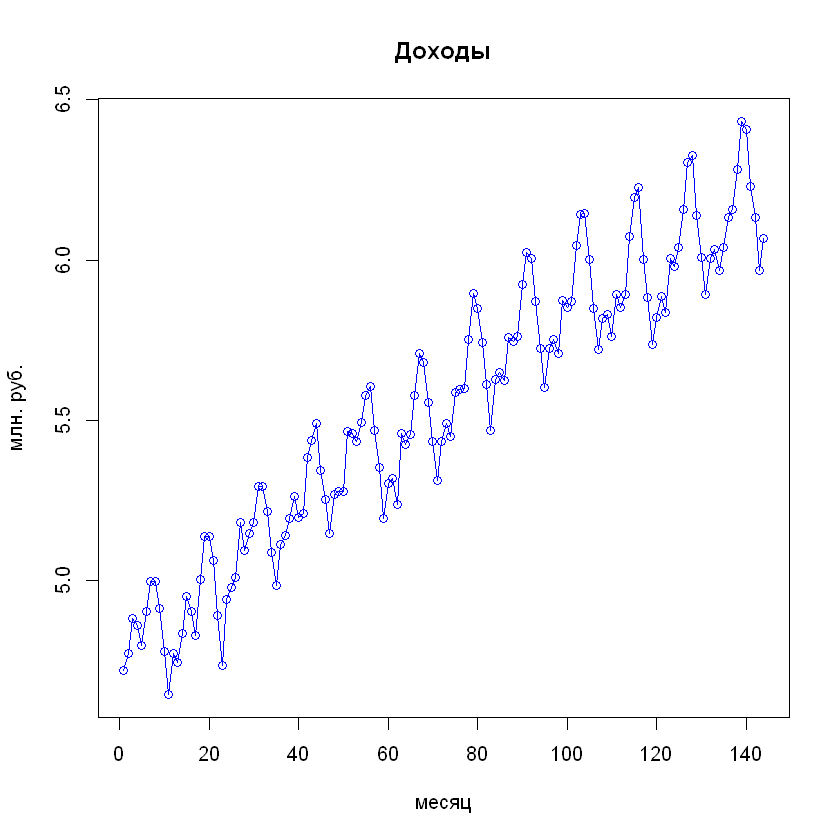

In [4]:
plot(M$Income, main="Доходы", ylab="млн. руб.", xlab="месяц", type="o", col="blue")

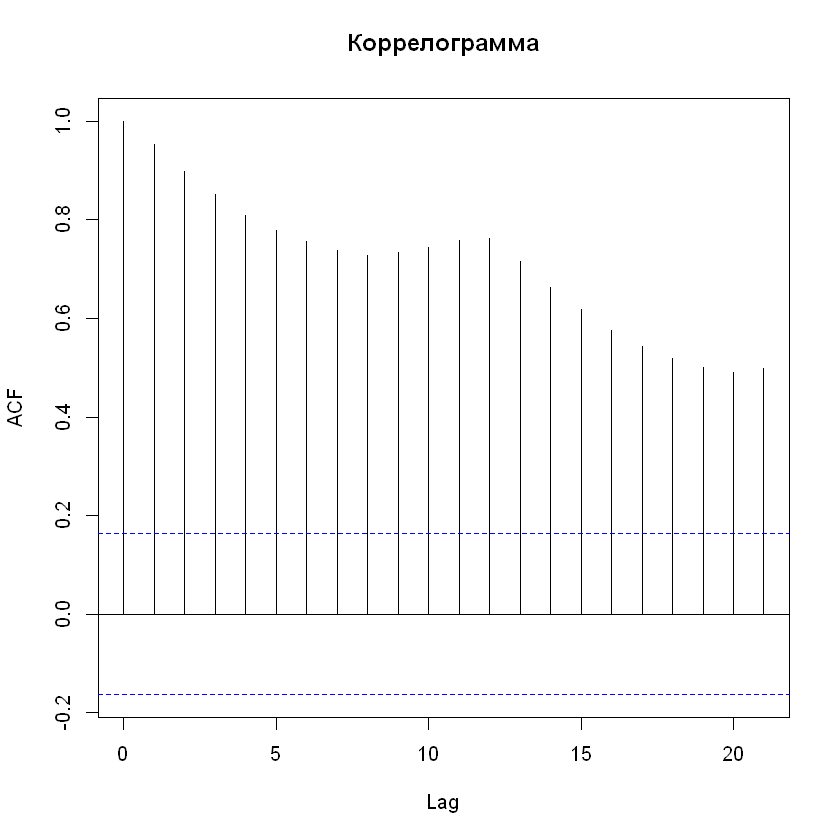

In [5]:
acf(M$Income, type="correlation", plot=TRUE, main="Коррелограмма")

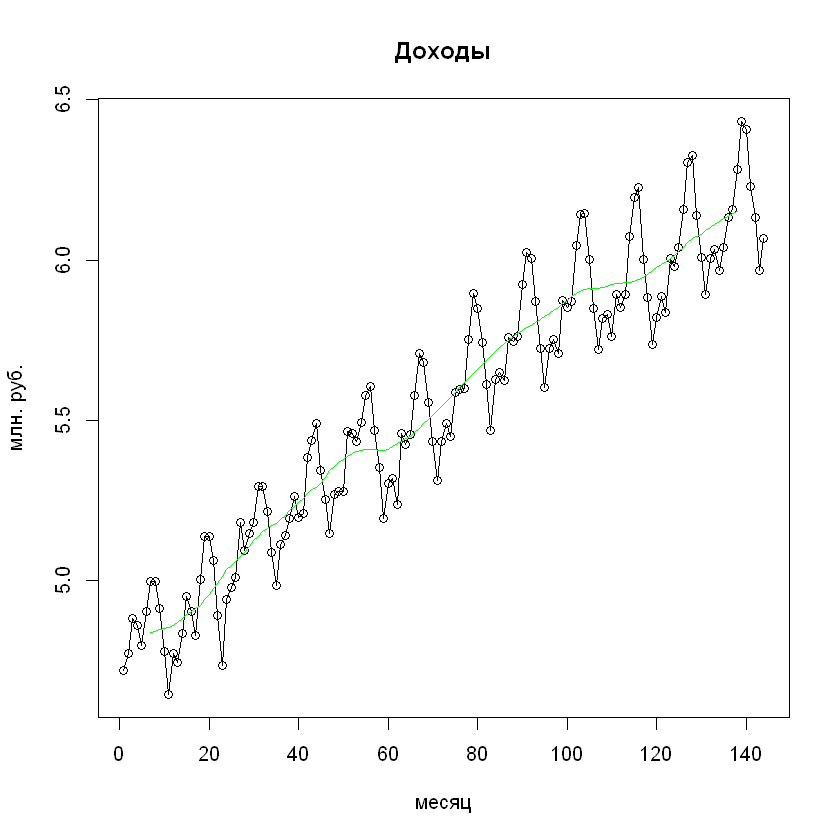

In [7]:
sn <- ma(M$Income, order=12, centre = TRUE) 
# сгладить временной ряд методом скользящего среднего
plot(M$Income, main="Доходы", ylab="млн. руб.", xlab="месяц", type="o")
lines(sn, col="green") # нарисовать сглаженный ряд

In [8]:
A<-matrix(data=M$Income-sn, nrow = 12) 
# вычесть из значений временного ряда сглаженное значение
SM<-apply(A, 1, function(x) mean(x, na.rm = TRUE))
M.S<-rep(SM,times=12) # записать сезонную составляющую временного ряда

In [9]:
Tr<-M$Income-M.S # удалить сезонную составляющую из временного ряда
T<-seq(from=1, to=144) # сформировать значения t
regM<-lm(Tr~T) # построить линейную регрессию
M.Trend<-coef(regM)[1]+coef(regM)[2]*T # записать тренд для временного ряда

[1] 0.8537091

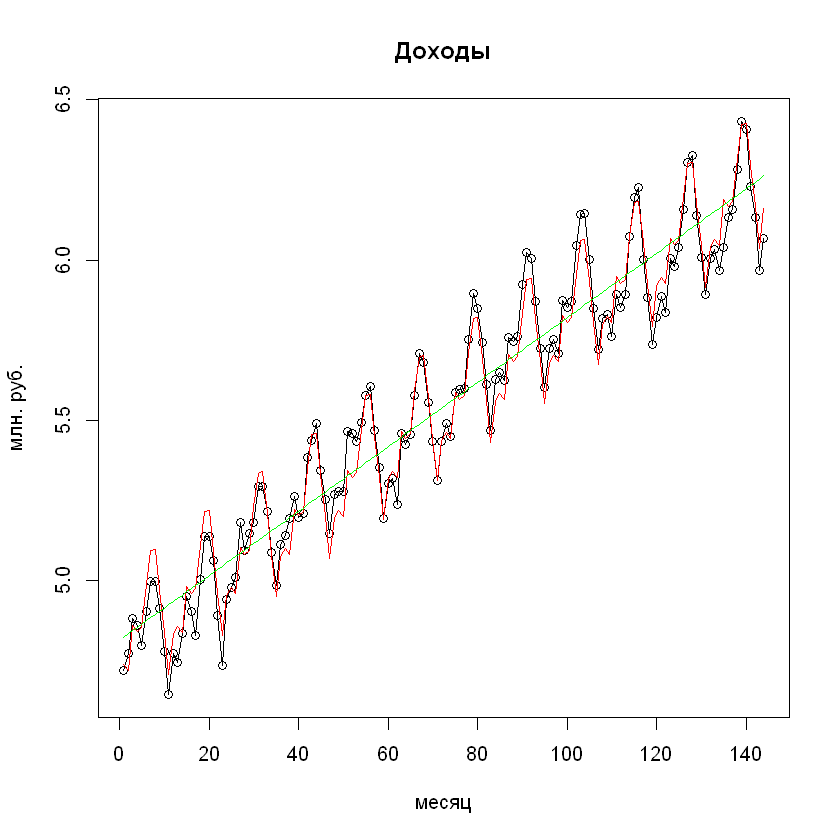

In [11]:
M.fit<-M.Trend+M.S # рассчитать значения временного ряда по модели
plot(M$Income, main="Доходы", ylab="млн. руб.", xlab="месяц", type="o") 
# график временного ряда
lines(M.fit, col="red") # график модели временного ряда
lines(M.Trend, col="green") # график тренда временного ряда
sum(abs((M$Income - M.fit)/M$Income))/length(M$Income)*100 # рассчитать MAPE

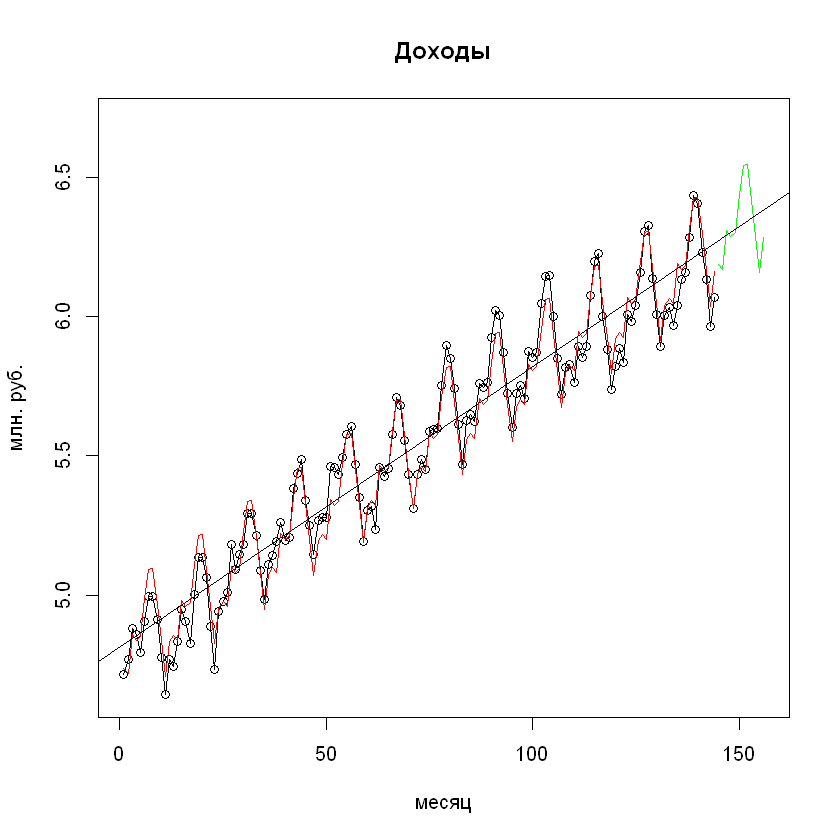

In [12]:
M.F<-array(dim = 12) # создать массив для хранения прогноза
T1<-seq(from=145, to=144+12) # создать массив для времени прогноза
M.F<-(coef(regM)[1]+coef(regM)[2]*T1)+SM # рассчитать прогнозные значения
plot(M$Income, main="Доходы", ylab="млн. руб.", xlab="месяц", type="o", xlim = 
c(1,144+12), ylim = c(min(M$Income), 6.7)) # график временного ряда
lines(M.fit, col="red") # график модели временного ряда
lines(x=T1 , y=M.F, col="green") # график прогноза
abline(regM)

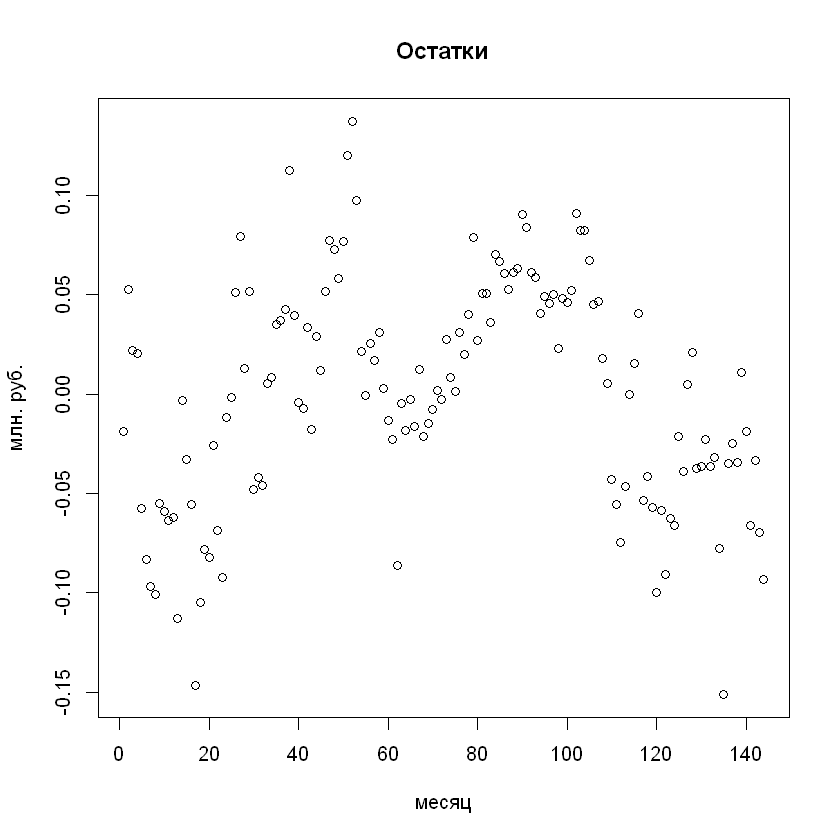


	Box-Pierce test

data:  M.Res
X-squared = 86.726, df = 1, p-value < 2.2e-16


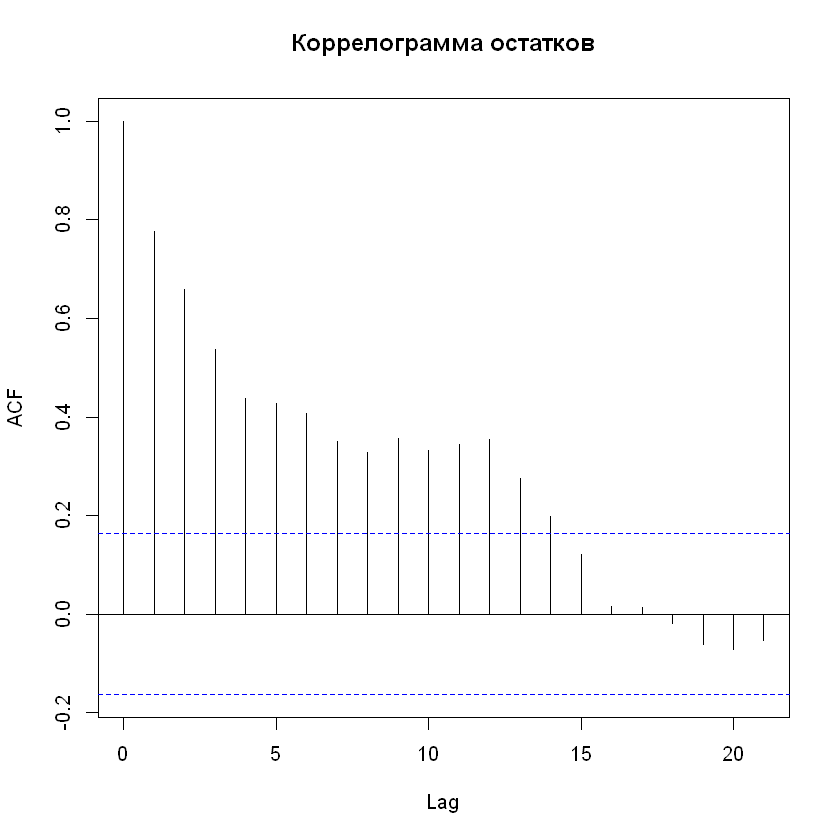

In [14]:
M.Res<-M$Income-M.fit # рассчитать остатки
plot(M.Res, type="p", main="Остатки", ylab="млн. руб.", xlab="месяц") # график остатков
acf(M.Res, main="Коррелограмма остатков") # коррелограмма остатков
Box.test(M.Res) # проверить остатки на белый шум

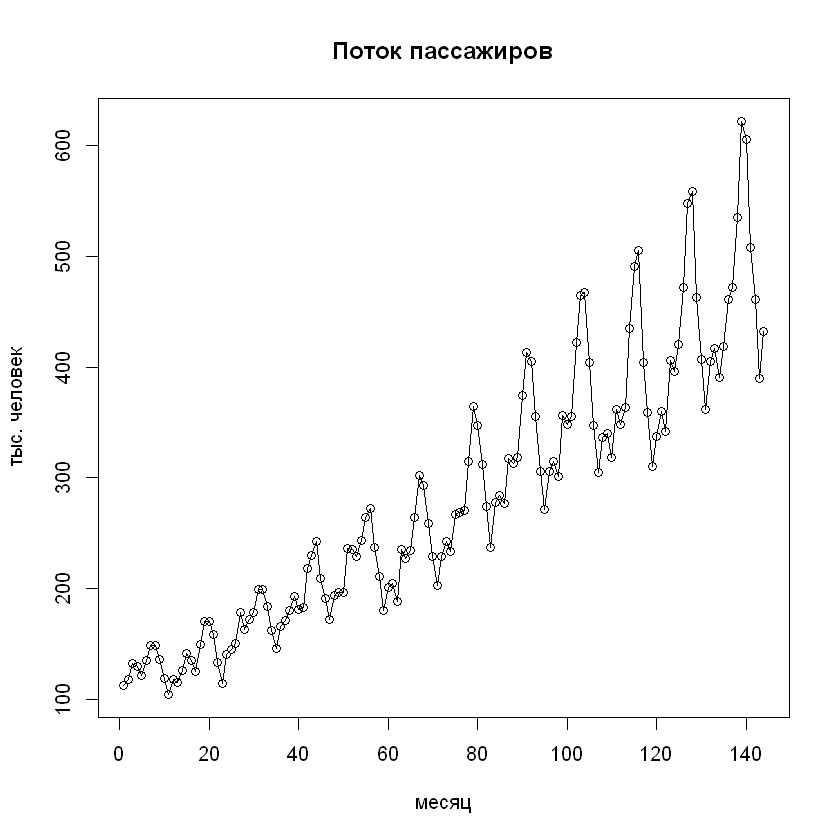

In [15]:
plot(M$Pass, main="Поток пассажиров", ylab="тыс. человек", xlab="месяц", type="o")

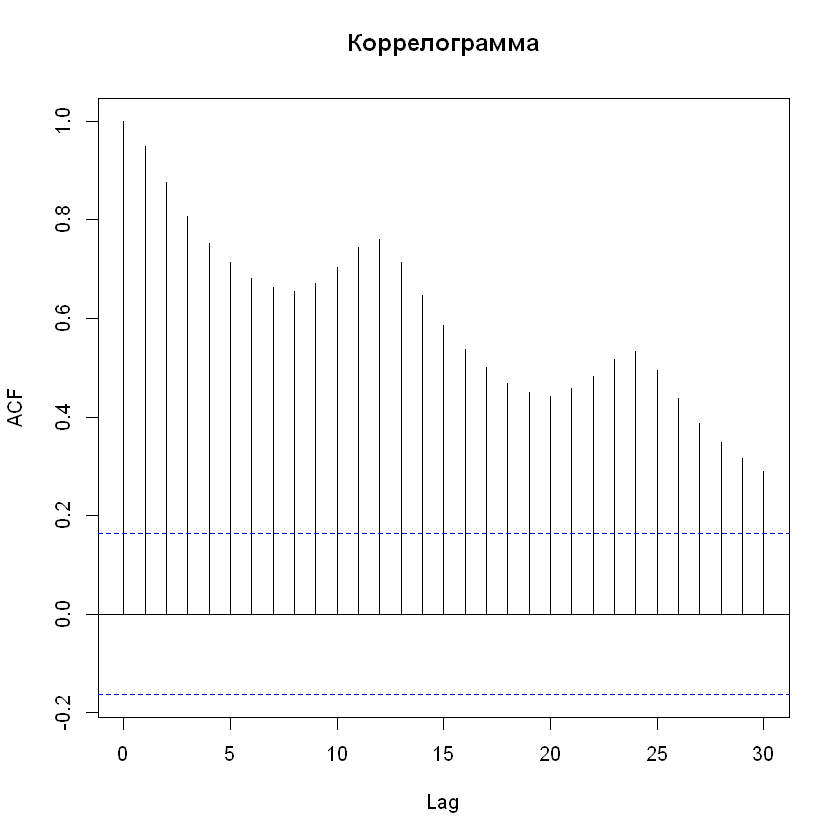

In [16]:
acf(M$Pass, type="correlation", plot=TRUE, main="Коррелограмма", lag.max = 30)

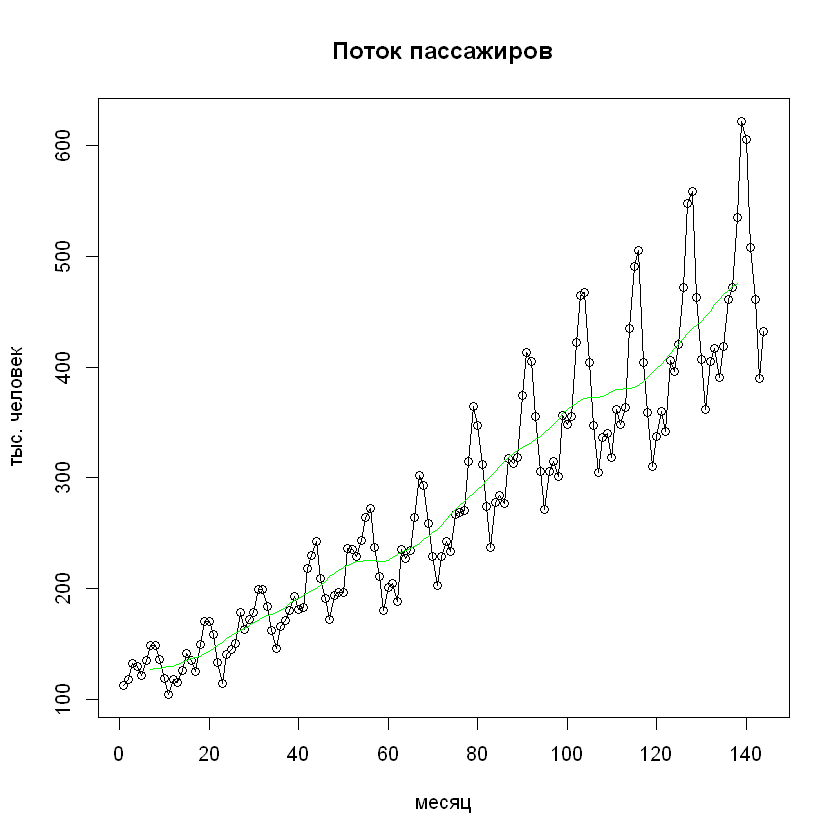

In [18]:
library(forecast)
sp <- ma(M$Pass, order=12, centre = TRUE) 
# сгладить временной ряд методом скользящего среднего
plot(M$Pass, main="Поток пассажиров", ylab="тыс. человек", xlab="месяц", type="o")
lines(sp, col="green") # нарисовать сглаженный ряд

In [19]:
Ap<-matrix(data=M$Pass/sp, nrow = 12) 
# разделить значения временного ряда на сглаженное значение
SP<-apply(Ap, 1, function(x) mean(x, na.rm = TRUE))
Mp.S<-rep(SP,times=12) # записать сезонную составляющую временного ряда

In [20]:
Trp<-M$Pass/Mp.S # удалить сезонную составляющую из временного ряда
T<-seq(from=1, to=144) # сформировать значения t
regMp<-lm(Trp~T) # построить линейную регрессию
Mp.Trend<-coef(regMp)[1]+coef(regMp)[2]*T # записать тренд для временного ряда

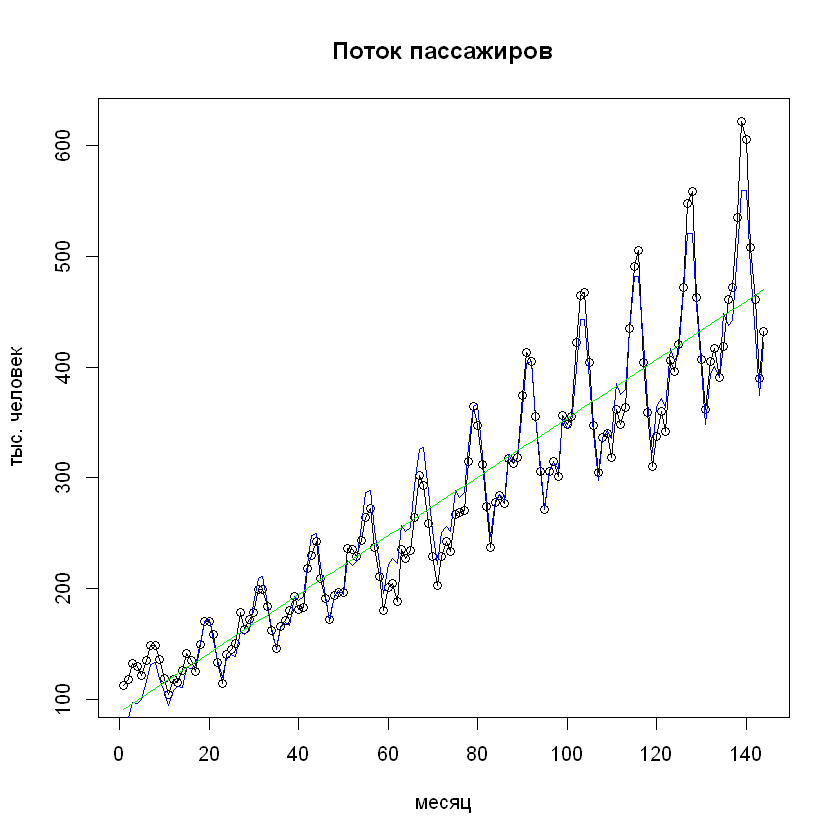

In [21]:
Mp.fit<-Mp.Trend*Mp.S # рассчитать значения временного ряда по модели
plot(M$Pass, main="Поток пассажиров", ylab="тыс. человек", xlab="месяц", type="o") 
# график временного ряда
lines(Mp.fit, col="blue") # график модели временного ряда
lines(Mp.Trend, col="green") # график тренда временного ряда

In [22]:
sum(abs((M$Pass - Mp.fit)/M$Pass))/length(M$Pass)*100 # рассчитать MAPE

[1] 5.436551

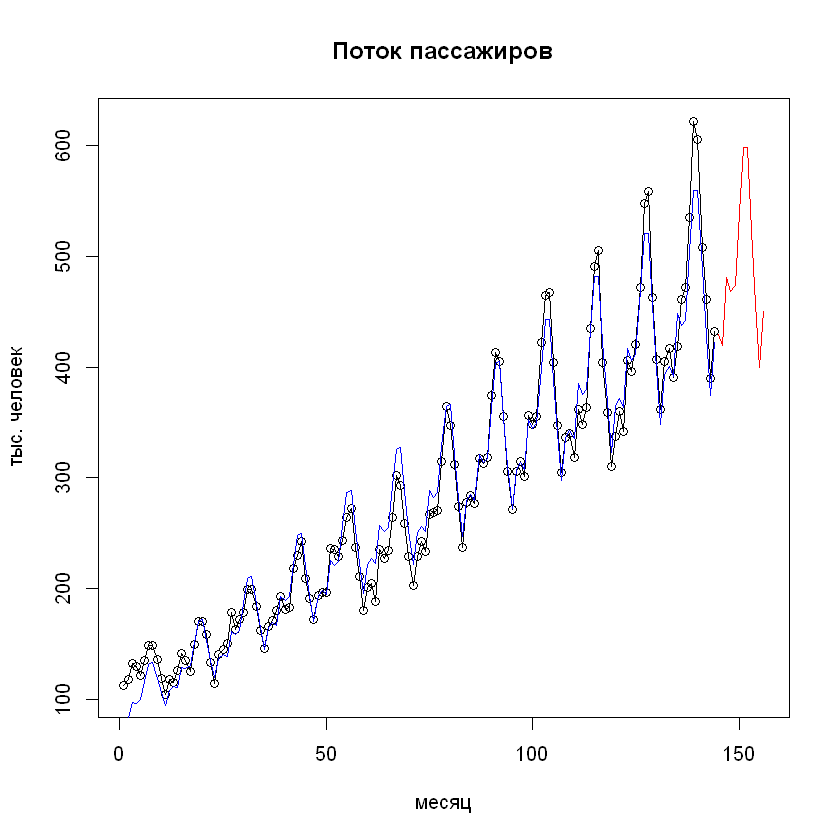

In [23]:
Mp.F<-array(dim = 12) # создать массив для хранения прогноза
T1<-seq(from=145, to=144+12) # создать массив для времени прогноза
Mp.F<-(coef(regMp)[1]+coef(regMp)[2]*T1)*SP # рассчитать прогнозные значения
plot(M$Pass, main="Поток пассажиров", ylab="тыс. человек", xlab="месяц", type="o", xlim = 
c(1,144+12)) # график временного ряда
lines(Mp.fit, col="blue") # график модели временного ряда
lines(x=T1 , y=Mp.F, col="red") # график прогноза

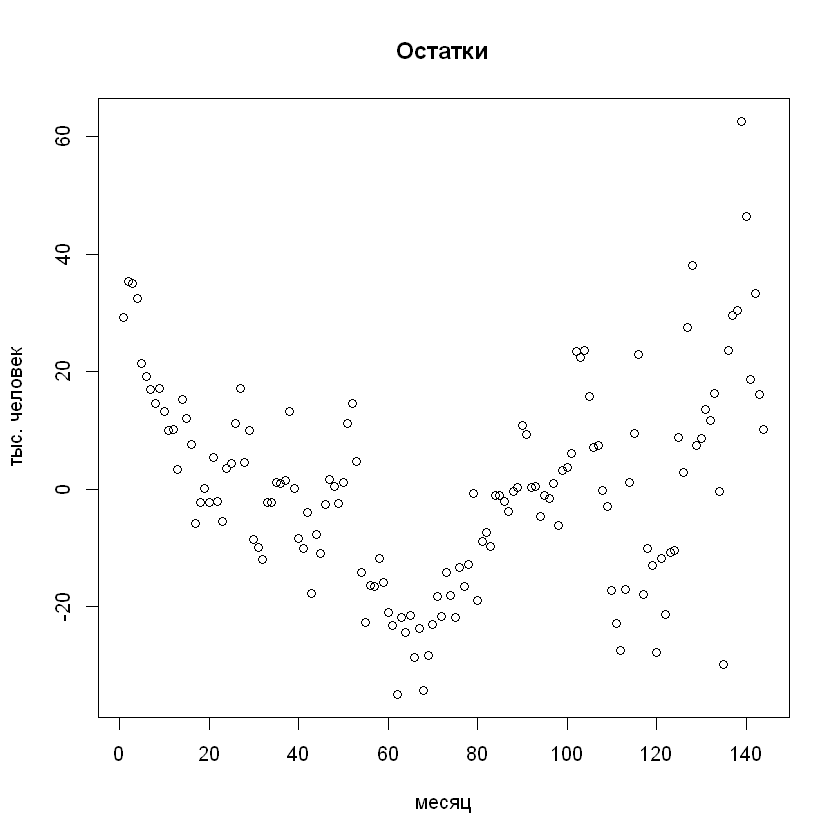


	Box-Pierce test

data:  Mp.Res
X-squared = 87.923, df = 1, p-value < 2.2e-16


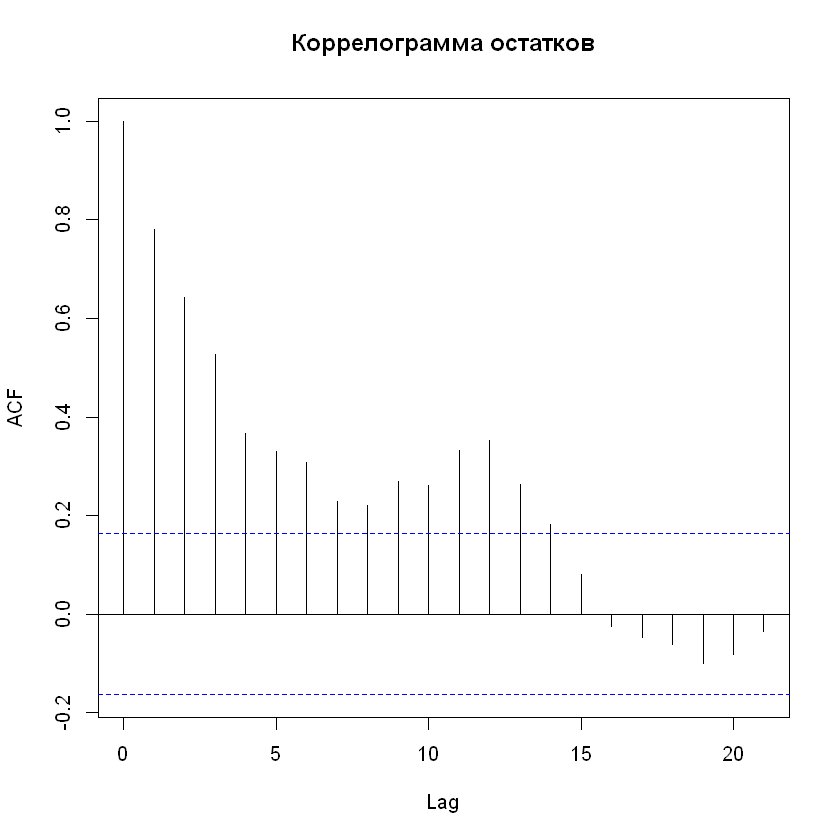

In [27]:
Mp.Res<-M$Pass-Mp.fit # рассчитать остатки
plot(Mp.Res, type="p", main="Остатки", ylab="тыс. человек", xlab="месяц") 
# график остатков
acf(Mp.Res, main="Коррелограмма остатков") # коррелограмма остатков
Box.test(Mp.Res) # проверить остатки на белый шум